In [1]:
import re
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

## The User class
 This contains all the messages and username of a particular user and its word
 count.

In [46]:
class User:
    def __init__(self,username):
        self.username = username
        self.messages=[]
        
    #This Returns the most used words count to N if N isn't specified it will return the first most used word
    def word_counter(self,N=None):
        texts=[]
        for i in range(len(self.messages)):
            temp_words=self.messages[i][1].split(' ')
            for word in temp_words:
                if (word != '<Media') and (word != 'omitted>'):
                    texts.append(word.lower())
                else:
                    pass
        texts=[word for word in texts if not word in set(stopwords.words('english'))]
        text_count = Counter(texts)
        if N == None:
            freq=text_count.most_common(1)
            return freq
        else:
            freq=text_count.most_common(N)
            return freq
        
    def __str__(self):
        return str(self.username)
        

## Preprocessing Stage

Change The PATH variable to The path of your chat file.

In [47]:
info = re.compile(r'(\d+/\d+/\d+), \d+:\d+ - (.+): (.+)')
users=[]
PATH=r"C:\Users\free\Documents\projects\chats\WhatsApp Chat with Compiler.txt"

total_msgs=[]
with open(PATH,'r',encoding='utf-8') as chat:
    msgs = chat.readlines()
    for i in range(len(msgs)):
        msgs[i] = msgs[i].strip()
        matches=info.match(str(msgs[i]))
        if matches:
            date = matches.group(1)
            username = matches.group(2)
            msg = matches.group(3)
            if username not in map(str,users):
                if ':' not in username:
                    users.append(User(username))
                elif username[:username.index(':')] not in map(str,users):
                    users.append(User(username[:username.index(':')]))
                else:
                    pass
            for user in users:
                if str(user) == username:
                    user.messages.append([date,msg])
                    total_msgs.append([username,date,msg])


## The Users in the chat.

In [48]:
for i in range(len(users)):
    print(users[i])

Compiler
Oblivion@Entity


## Chat count for each user

In [49]:
for i in range(len(users)):
    print(f'{users[i]} has {len(users[i].messages)} messages')

Compiler has 327 messages
Oblivion@Entity has 196 messages


## The most used word of The Users 

In [50]:
for i in range(len(users)):
    print(f'{str(users[i])}\'s Frequently Used word is \'{users[i].word_counter()[0][0]}\'')
    print()

Compiler's Frequently Used word is 'i'm'

Oblivion@Entity's Frequently Used word is 'ok'



## The total message sent by the Two parties.

In [51]:
print(len(total_msgs))

523


## Top 10 most used word in chat

In [52]:
texts=[]
for i in range(len(total_msgs)):
    temp_words=total_msgs[i][2].split(' ')
    for word in temp_words:
        if (word != '<Media') and (word != 'omitted>'):
            texts.append(word.lower())
        else:
            pass

texts = [word for word in texts if not word in set(stopwords.words('english'))]
text_count = Counter(texts)
freq=text_count.most_common(10)
for i in range(len(freq)):
    print(freq[i][0],f'\t({freq[i][1]})')
    print()

i'm 	(25)

school 	(19)

ok 	(17)

yes 	(16)

u 	(15)

okay 	(14)

back 	(14)

get 	(14)

i'll 	(13)

till 	(12)



## Messages count plot with Time

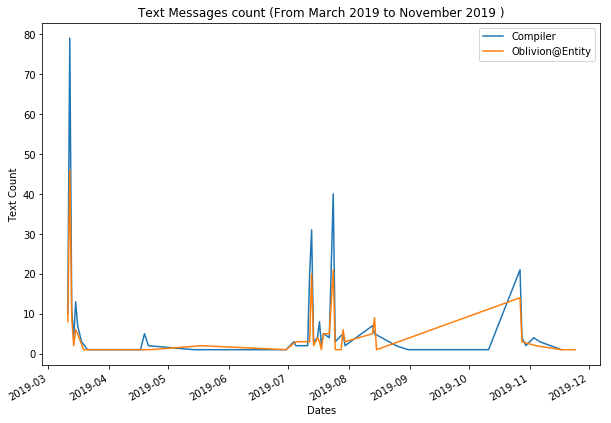

In [53]:
fig=plt.figure(figsize=(10,7))
for i in range(len(users)):
    msg_date=[]
    for j in range(len(users[i].messages)):
        msg_date.append(users[i].messages[j][0])
    count = Counter(msg_date)
    dates = [datetime.strptime(x,"%m/%d/%y") for x in count.keys()]
    value = [x for x in count.values()]
    plt.plot(dates,value,label=str(users[i]))

plt.xlabel('Dates')
plt.ylabel('Text Count')
plt.title("Text Messages count (From {} to {} )".format(min(dates).strftime('%B %Y'),max(dates).strftime('%B %Y')))
plt.legend()
fig.autofmt_xdate()
plt.savefig(f'C:\\Users\\free\\Documents\\projects\\chats\\media\\{str(users[0])} and {str(users[1])}_messages.png',dpi=300)
plt.show()


## No of times each user starts a conversation

In [54]:
#TODO - get The Person who starts chat first
current_date = ''
start_count = {str(users[0]):0,
               str(users[1]):0}
for i in range(len(total_msgs)):
    if current_date != total_msgs[i][1]:
        start_count[total_msgs[i][0]] = start_count[total_msgs[i][0]] + 1
        current_date = total_msgs[i][1]
    else:
        pass
for user in start_count:
    print(f'{user} has started a converation {start_count[user]} times.')
    print()

Compiler has started a converation 30 times.

Oblivion@Entity has started a converation 20 times.

